In [21]:
import keras
from keras.datasets import cifar10
import pandas as pd

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

display('x_train shape:', x_train.shape)
display('y_train shape:', y_train.shape)

display('x_test shape:', x_test.shape)
display('y_test shape:', y_test.shape)

'x_train shape:'

(50000, 32, 32, 3)

'y_train shape:'

(50000, 1)

'x_test shape:'

(10000, 32, 32, 3)

'y_test shape:'

(10000, 1)

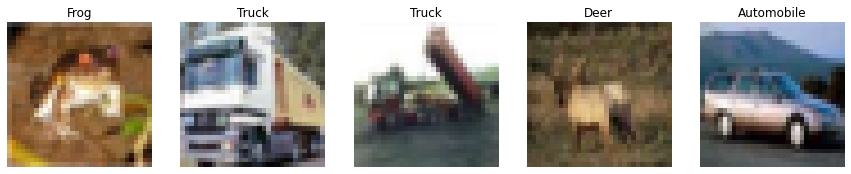

In [22]:
import matplotlib.pyplot as plt

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# show sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 15))

for i, axe in enumerate(axes):
  axe.axis('off')
  axe.imshow(x_train[i])
  axe.set_title(labels[y_train[i][0]])

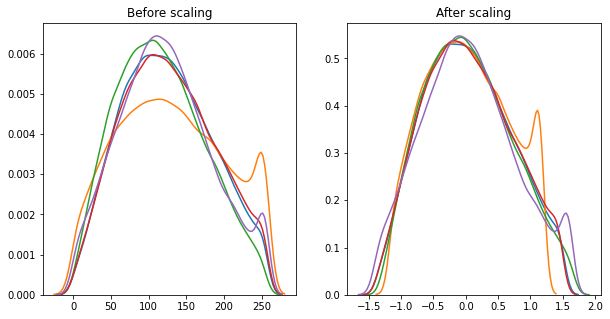

In [23]:
import random
import seaborn as sns
import numpy as np
import cv2
from sklearn.preprocessing import RobustScaler

grayscale_x_train = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x_train])
X_train = grayscale_x_train.reshape(-1, 32*32)

random.seed(1)

sample = random.sample(range(32*32), 5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title("Before scaling")
ax2.set_title("After scaling")

for i in sample:
  sns.kdeplot(X_train[:,i], ax=ax1)

# scale features

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
for i in sample:
  sns.kdeplot(X_train_scaled[:,i], ax=ax2)